In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats


In [12]:
from data.parameters import XI_5, XI_6, XI_7, XI_8


In [13]:
def proba_waiting(hours):
    """
    Calculate the probability of having to wait (event did not occur yet).

    Parameters:
    hours (float): The number of hours to calculate the waiting probability for.
    Returns:
    float: The estimated probability of waiting for the given number of hours.
    """
    
    return XI_5*np.exp(-XI_6*np.sqrt(hours))+XI_7*np.exp(-XI_8*np.cbrt(hours))

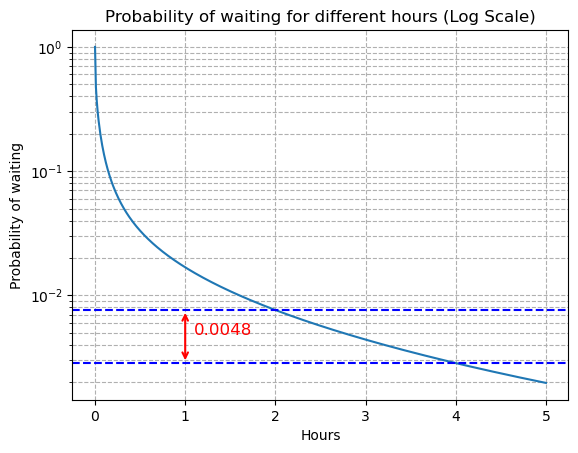

In [14]:
# Plot the probability of waiting for different hours using a log scale
# find the probabilities for 2 hours and 4 hours

hours = np.linspace(0, 5, 501)
proba = proba_waiting(hours)
plt.plot(hours, proba)
plt.xlabel('Hours')
plt.ylabel('Probability of waiting')
plt.yscale('log')
plt.title('Probability of waiting for different hours (Log Scale)')
# find the point a where time is 2 hours
# find the point b where time is 4 hours
index_2h = np.where(hours == 2)[0]
index_4h = np.where(hours == 4)[0]
proba_2h = proba[index_2h]
proba_4h = proba[index_4h]
# draw horizontal lines at a and b (not vertical lines)

plt.axhline(y=proba[index_2h], color='b', linestyle='--')
plt.axhline(y=proba[index_4h], color='b', linestyle='--')
# add log grid
plt.grid(True, which="both", ls="--")

# Draw a vertical arrow between the lines
plt.annotate(
    '', xy=(1.0, proba_4h), xytext=(1.0, proba_2h),
    arrowprops=dict(arrowstyle='<->', color='red', lw=1.5)
)

# Add the text showing the difference in probabilities
prob_difference = proba_2h - proba_4h
plt.text(1.1, (proba_2h + proba_4h) / 2, 
         f'{prob_difference[0]:.4f}', 
         color='red', fontsize=12, verticalalignment='center')


# save it to a file called waiting_time.png in the folder figures
plt.savefig('figures/waiting_time.png')



In [21]:
# compute the derivative of the proba_waiting function
def success_pdf(hours):
    """
    Calculate the occurence probability, ie the derivative of the probability of having to wait.

    Parameters:
    hours (float): The number of hours to calculate the waiting probability for.
    Returns:
    float: The estimated derivative of the probability of waiting for the given number of hours.
    """
    
    return (XI_5*XI_6)*(2*np.sqrt(hours))**(-1/2)*np.exp(-XI_6*np.sqrt(hours)) + (XI_7*XI_8)*(3*np.cbrt(hours))**(2/3)*np.exp(-XI_8*np.cbrt(hours))

In [26]:
success_pdf(1/15)

np.float64(1.2782823637184353)

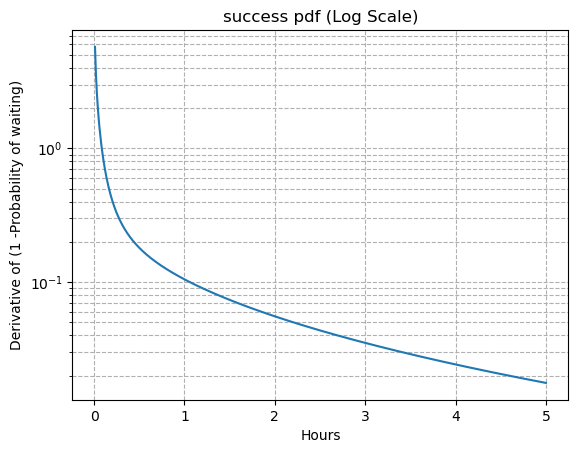

In [16]:
# plot the proba_waiting_derivative function for hours[1:] using a log scale
proba_derivative = success_pdf(hours[1:])
plt.plot(hours[1:], proba_derivative)
plt.xlabel('Hours')
plt.ylabel('Derivative of (1 -Probability of waiting)')
plt.yscale('log')
# add log grid
plt.grid(True, which="both", ls="--")
plt.title('success pdf (Log Scale)')
# save it to a file called waiting_time_derivative.png in the folder figures
plt.savefig('figures/waiting_time_derivative.pdf')

In [29]:
from scipy.misc import derivative  # For numerical derivatives


In [28]:
#calculate the integral of the success_pdf function from 0 to 5
#using the trapezoidal rule
integral = np.trapezoid(proba_derivative, hours[1:])
print(integral)

ValueError: operands could not be broadcast together with shapes (9,) (499,) 

In [17]:
# create an array starting from 0 to 36000 with a step of 1
minutes = np.arange(0, 36000, 1)
hours= minutes/60
# calculate the pdf of the success function for the array
pdf = success_pdf(hours)
# calculate the cdf of the success function for the array
cdf = success_cdf(hours)
# plot the pdf and cdf

In [18]:
success_pdf(hours)

array([0.03630017, 0.03605108, 0.03580454, 0.03556053, 0.03531901,
       0.03507993, 0.03484327, 0.034609  , 0.03437707, 0.03414746,
       0.03392014])

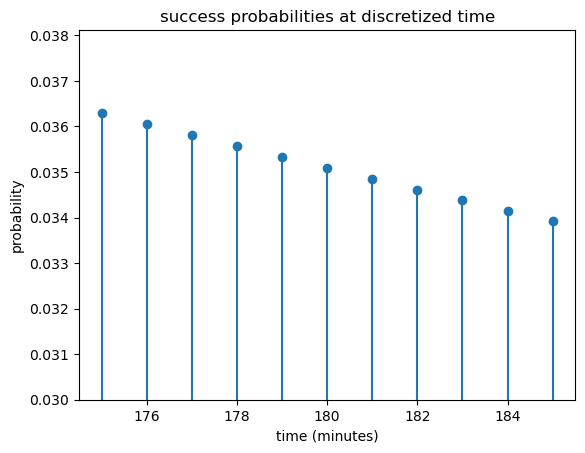

<Figure size 640x480 with 0 Axes>

In [19]:


plt.stem(minutes, pdf)
# bottom y should be 0.03
plt.ylim(bottom=0.03)
plt.xlabel('time (minutes)')
plt.title('success probabilities at discretized time')
plt.ylabel('probability')
plt.show()
# save it to a file called success_probabilities.png in the folder figures
plt.savefig('figures/success_probabilities.pdf')


In [20]:
# write scipy.stats.rv_continuous class for the success_pdf function
class SuccessPDF(stats.rv_continuous):
    def _pdf(self, x):
        return success_pdf(x)

# create an instance of the SuccessPDF class from 0 to infinity
success_pdf_instance = SuccessPDF(a=1/3600, b=72)

# calculate the mean and variance of the success_pdf_instance
mean = success_pdf_instance.mean()
variance = success_pdf_instance.var()

# print the mean and variance
print(f'Mean: {mean:.4f}')
print(f'Variance: {variance:.4f}')

# calculate the quartiles
quartiles = success_pdf_instance.ppf([0.25, 0.5, 0.75])

# print the quartiles
print(f'25th percentile: {quartiles[0]:.4f}')
print(f'50th percentile: {quartiles[1]:.4f}')
print(f'75th percentile: {quartiles[2]:.4f}')

Mean: 20.9642
Variance: 978.1764
25th percentile: 0.0780
50th percentile: 1.2798
75th percentile: 72.0000
